In [2]:
import pandas as pd
import psycopg2
import warnings

warnings.filterwarnings('ignore')

# Database configurations
DB_NAME = "branchdsprojectgps"
DB_USER = "datascientist"
DB_PASSWORD = "47eyYBLT0laW5j9U24Uuy8gLcrN"
DB_HOST = "branchhomeworkdb.ccc0r2wfuew7.us-east-1.rds.amazonaws.com"
DB_PORT = "5432"

conn = psycopg2.connect(dbname=DB_NAME, user=DB_USER, password=DB_PASSWORD, host=DB_HOST, port=DB_PORT)

# Fetching data into DataFrames
loan_outcomes_df = pd.read_sql("SELECT * FROM loan_outcomes", conn)
user_gps_fixes_df = pd.read_sql("SELECT * FROM user_gps_fixes", conn)
user_attributes_df = pd.read_sql("SELECT * FROM user_attributes", conn)


In [3]:
loan_outcomes_df.head()

,user_id,application_at,loan_outcome
0,1,2017-08-14 09:08:50.000000,defaulted
1,2,2016-05-17 10:10:12.447976,repaid
2,3,2016-10-20 10:07:20.459081,defaulted
3,4,2017-01-13 13:03:34.000000,defaulted
4,5,2016-11-03 15:41:39.124610,repaid


In [4]:
user_gps_fixes_df.head()

,id,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id
0,1,2017-06-22 09:37:20,2017-06-22 09:43:42,36.840540,-1.294342,68.4,0.0,0.0,fused,1
1,2,2017-08-14 07:50:27,2017-08-14 09:05:27,36.895270,-1.341928,1409.0,0.0,0.0,fused,1
2,3,2017-06-13 10:34:29,2017-06-13 10:54:48,36.811903,-1.307220,68.4,0.0,0.0,fused,1
3,4,2017-06-18 12:16:20,2017-06-18 12:16:24,36.907049,-1.309984,1581.0,0.0,0.0,fused,1
4,5,2017-06-28 09:39:08,2017-06-28 09:58:12,36.839396,-1.280310,1396.0,0.0,0.0,fused,1


In [5]:
user_attributes_df.head()

,user_id,age,cash_incoming_30days
0,1,42,8988.12
1,2,36,9968.12
2,3,27,59.04
3,4,38,2129.03
4,5,33,2102.53


In [6]:
loan_outcomes_df.describe()

,user_id
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


In [7]:
user_gps_fixes_df.describe()

,id,longitude,latitude,accuracy,altitude,bearing,user_id
count,26710.000000,26710.000000,26710.000000,2.671000e+04,26710.000000,26710.000000,26710.000000
mean,13355.500000,36.503743,-1.031422,1.006282e+03,332.259599,15.072191,194.645938
std,7710.657181,4.172315,1.850920,1.905380e+04,646.511986,57.378459,108.631662
min,1.000000,-85.232791,-24.645763,-2.147463e+06,-161.700000,-1.000000,1.000000
25%,6678.250000,36.163351,-1.299535,2.050275e+01,0.000000,0.000000,103.000000
50%,13355.500000,36.825059,-1.232870,1.100000e+02,0.000000,0.000000,191.000000
75%,20032.750000,36.950463,-0.402338,2.200000e+03,0.000000,0.000000,278.000000
max,26710.000000,117.058355,56.242041,6.451553e+05,3012.900000,359.440000,400.000000


In [8]:
user_attributes_df.describe()

,user_id,age,cash_incoming_30days
count,400.000000,400.000000,400.000000
mean,200.500000,36.487500,7896.301075
std,115.614301,13.243236,7037.481340
min,1.000000,18.000000,11.900000
25%,100.750000,27.000000,2602.472500
50%,200.500000,34.000000,6004.240000
75%,300.250000,44.000000,10989.405000
max,400.000000,105.000000,41657.810000


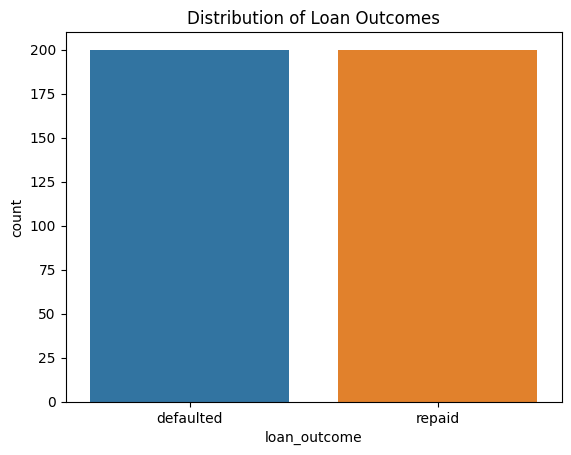

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

## Load Outcomes Distribution

sns.countplot(data=loan_outcomes_df, x='loan_outcome')
plt.title('Distribution of Loan Outcomes')
plt.show()

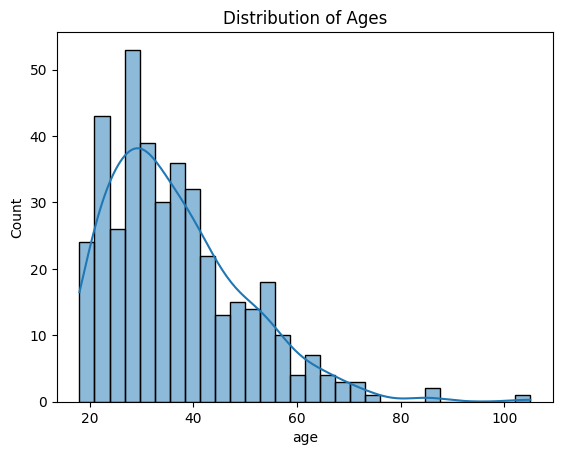

In [10]:
## Age Distribution

sns.histplot(data=user_attributes_df, x='age', bins=30, kde=True)
plt.title('Distribution of Ages')
plt.show()

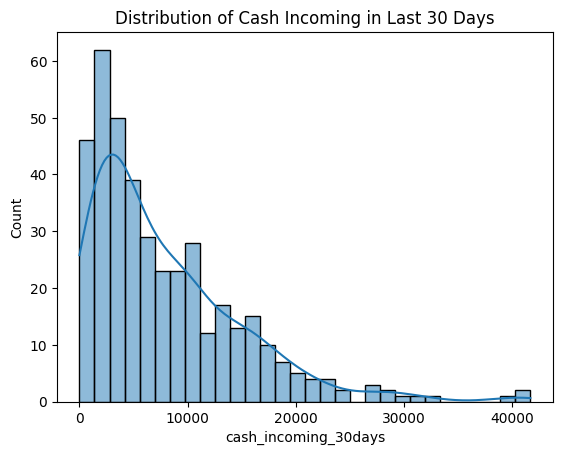

In [11]:
## Cash Incoming in Last 30 Days Distribution

sns.histplot(data=user_attributes_df, x='cash_incoming_30days', bins=30, kde=True)
plt.title('Distribution of Cash Incoming in Last 30 Days')
plt.show()

In [ ]:
# Taking the user_attributes_df and loan_outcomes_df for correlation analysis
merged_df = pd.merge(user_attributes_df, loan_outcomes_df, on='user_id')
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


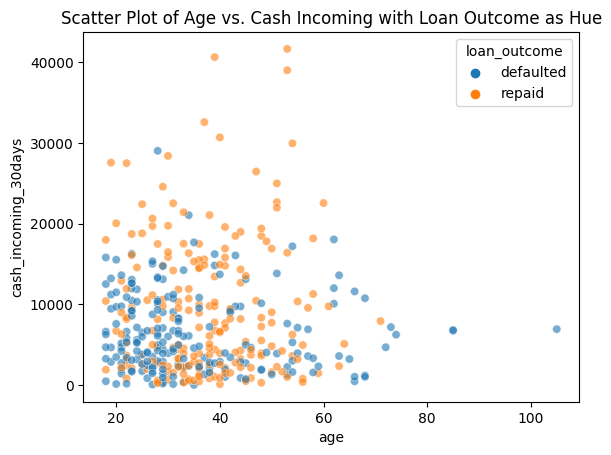

In [15]:
sns.scatterplot(data=merged_df, x='age', y='cash_incoming_30days', hue='loan_outcome', alpha=0.6)
plt.title('Scatter Plot of Age vs. Cash Incoming with Loan Outcome as Hue')
plt.show()

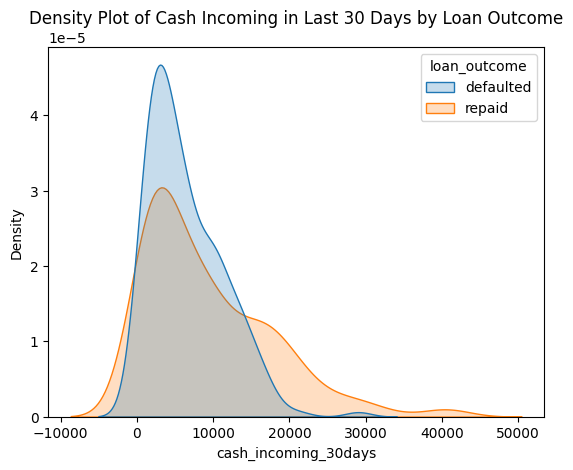

In [16]:
sns.kdeplot(data=merged_df, x='cash_incoming_30days', hue='loan_outcome', fill=True)
plt.title('Density Plot of Cash Incoming in Last 30 Days by Loan Outcome')
plt.show()